<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/17_Matplotlib_Histograms.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Matplotlib Histograms

Load data.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/munchymahesh/Desktop/Python/PYTHON_DATA_PROJECT/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Notes

### Plotting 

* `hist()`: plot a histogram.
* Common Parameters:
    * `x` - the data you want to plot
    * `bins` - the number of bins or bin edges
    * `range` - lower and upper range of the bins 
* Syntax: `hist(x, bins=None, range=None)`

### General Info

* Purpose: 
    * Understanding the distribution of continuous numerical data by showing the frequency of data points within certain range or intervals (bins). 
    * It can help reveal patterns like skewness, bimodality or normal distribution. 
* Description: It's divided into equal-sized bins or intervals along the x-axis, and the height of each bar represents the frequency or count of data points falling within that bin range. 
* Difference between bar charts:
    * Histograms displays continuous numerical data, bar charts represent categorical or discrete data. 
    * X-axis on histogram represents the bins of the continuous variable, while a bar chart represents the discrete categories. 
    * Histograms are used to visualize the distribution and frequency of a single continuous variable; bar charts are used to compare values or frequencies across different categories. 


## Example 

Let's create a histogram to show the distribution of yearly salaries (`salary_year_avg`) for data engineer positions.

First, we're only going to include Data Engineer job postings, then remove any entries without a specified average yearly salary (NaN values), and create the histogram using `hist()`.  

In [2]:
# Only get data engineer jobs in the US
df_DE_AUS = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Australia')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_AUS = df_DE_AUS.dropna(subset=['salary_year_avg'])

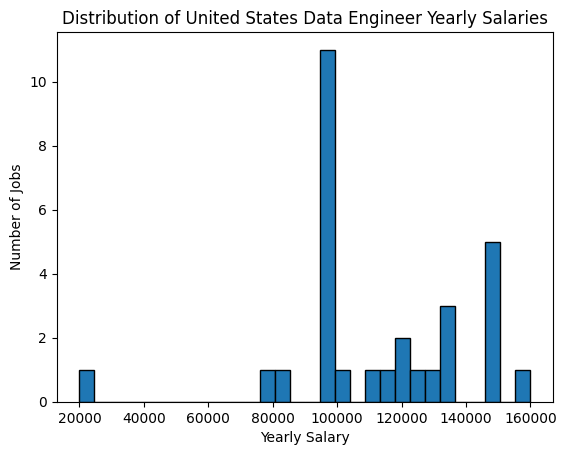

In [3]:
# Plot histogram for yearly average salary


df_DE_AUS['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
# Alternatively, with matplotlib
# plt.hist(df_DE_AUS['salary_year_avg'], bins=30, edgecolor='black')

plt.title('Distribution of United States Data Engineer Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

##### How would you interpret this?

The histogram shows that most data analyst jobs in the U.S. offer salaries between $75,000 and $150,000, peaking around $100,000 to $125,000. As salaries increase beyond $150,000, the number of positions declines significantly. Very few data analyst roles pay above $250,000.

### Customization

This graph is pretty basic so let's add in some customization that we learned. Specifically, formatting the x-axis so it adds 'K' and a dollar sign, to help with readability (e.g. 1000 shows as $1k).

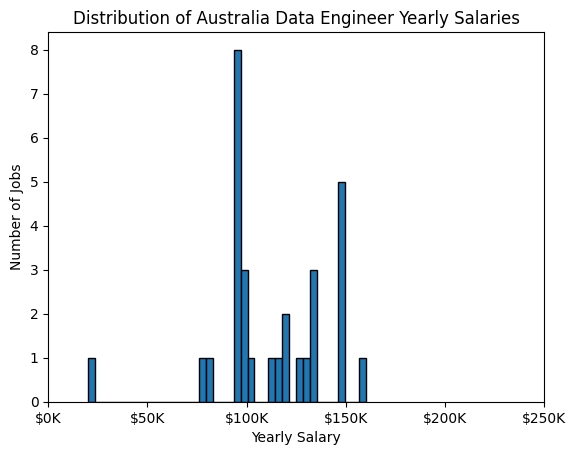

In [4]:
df_DE_AUS['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Distribution of Australia Data Engineer Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()